# Geospatial analysis for raster data

**Objectives:** To learn about how to read, write and visualize the raster data using python language. 

### Table of content

###### 1. Installation and importing rasterio
###### 2. Read and write geoTiff raster data
###### 3. Visualization of geoTIff using python
###### 4. Masking raster using shapefile
###### 4. Mathematical operation on raster
###### 5. Reclassification raster (Optional)
###### 6. Resampling raster (Optional)
###### 7. NDVI calculation (Optional)

<br/><br/>
**GDAL** - the Geospatial Data Abstraction Library is a software library for reading and writing raster and vector geospatial data formats and forms the basis of most software for processing geospatial data. Most of the popular GIS softwares like arcGIS, QGIS uses the GDAL for the reading, writing and to do some analysis on geospatial datasets.

For raster data analysis we are going to use [rasterio](https://rasterio.readthedocs.io/en/latest/) package developed by [mapbox](https://www.mapbox.com/). Rasterio is the open-source python package for reading, writing and analyzing the raster dataset.

**Rasterio documentation:** https://rasterio.readthedocs.io

**Rasterio github repo:** https://github.com/mapbox/rasterio

**Rasterio PyPI:** https://pypi.org/project/rasterio/1.2.6/

# Installation of rasterio

Rasterio is a GDAL and Numpy-based Python library designed to make your work with geospatial raster data more productive, more fun Rasterio reads and writes these formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON. The rasterio can be installed using conda command. The following cell will install the rasterio and fiona,

# Import required packages

The following line of code will import the resterio and other required packages

In [1]:
import rasterio
import numpy as np
import fiona

print('Rasterio version: {}'.format(rasterio.__version__) )
print('fiona version: {}'.format(fiona.__version__) )

Rasterio version: 1.3.9
fiona version: 1.9.5


# Reading the raster dataset

As explained above the rasterio is used to read, write and process the raster dataset. We use `open` function from rasterio to open the raster data.

In [8]:
# path to the raster data
in_img = r"E:\GEOSPATIAL\Geospatial data analysis\geospatial-data-analysis-python\data\geotiff\nepal_lc_2020.tif"

# Open a raster data
ds = rasterio.open(in_img)
print(ds)

# reading the data
data = ds.read()
print(data.shape)

<open DatasetReader name='E:/GEOSPATIAL/Geospatial data analysis/geospatial-data-analysis-python/data/geotiff/nepal_lc_2020.tif' mode='r'>
(1, 1485, 2932)


## Reading some additional informations
Also we can read the additional informations like datatype, number of cells, rows, columns etc of the raster file. Now, we are going to read the following information of the raster,

1. Image filename
2. Number of bands
3. Number of rows and columns
4. Driver
5. Coordinate system
6. Metadata
7. Description
8. Size
9. dataType
10. mininum and maximum value

In [9]:
# what is the name of this image
img_name = ds.name
print('Image filename: ', img_name)
print("----------------------------------------------------------------------------------------------------")

# How many bands does this image have?
num_bands = ds.count
print('Number of bands in image: ', num_bands)
print("----------------------------------------------------------------------------------------------------")

# How many rows and columns?
rows, cols = ds.shape
print('Image size is: {0} rows x {1} columns.'.format(rows, cols))
print("----------------------------------------------------------------------------------------------------")

# What driver was used to open the raster?
driver = ds.driver
print('Raster driver: ', driver)
print("----------------------------------------------------------------------------------------------------")

# What is the raster's projection?
proj = ds.crs
print('Image projection: ', proj)
print("----------------------------------------------------------------------------------------------------")

# What is the raster's "geo-transform"
gt = ds.transform
print('Image geo-transform: ', gt)
print("----------------------------------------------------------------------------------------------------")

# Does the raster have a description?
desc = ds.descriptions
print('Raster description: ', desc)
print("----------------------------------------------------------------------------------------------------")

# Does the raster have a metadata?
metadata = ds.meta
print('All raster metadata: ', metadata)
print("----------------------------------------------------------------------------------------------------")

# Size of the image
data_size = data.size
print("Data size: ", data_size)
print("----------------------------------------------------------------------------------------------------")

# Data type of the image
dtype = data.dtype
print("Data type: ", dtype)
print("----------------------------------------------------------------------------------------------------")

# Get minimum and maximum value 
min_value = data.min()
max_value = data.max()
print("Data minimum value: ", min_value)
print("Data maximum value: ", max_value)
print("----------------------------------------------------------------------------------------------------")

# Get width and height of the raster
shape = data.shape
print("Data shape: ", shape)
print("----------------------------------------------------------------------------------------------------")

Image filename:  E:/GEOSPATIAL/Geospatial data analysis/geospatial-data-analysis-python/data/geotiff/nepal_lc_2020.tif
----------------------------------------------------------------------------------------------------
Number of bands in image:  1
----------------------------------------------------------------------------------------------------
Image size is: 1485 rows x 2932 columns.
----------------------------------------------------------------------------------------------------
Raster driver:  GTiff
----------------------------------------------------------------------------------------------------
Image projection:  EPSG:4326
----------------------------------------------------------------------------------------------------
Image geo-transform:  | 0.00, 0.00, 80.06|
| 0.00,-0.00, 30.47|
| 0.00, 0.00, 1.00|
----------------------------------------------------------------------------------------------------
Raster description:  (None,)
-----------------------------------------

# Visualization of raster data

The rasterio has the show function, which allows us to display the image. First of all we need to import the library after that we can visualize the map. 

*transform (Affine, optional)* – Defines the affine transform if source is an array.

*cmap (color_ramp name, optional)* - The name of the color ramp. You can find the available name list in [Matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

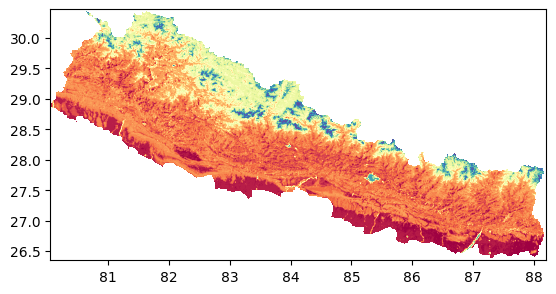

<Axes: >

In [10]:
# import the show function which allows us to display the image
from rasterio.plot import show 


show(ds, transform=ds.transform, cmap='Spectral')

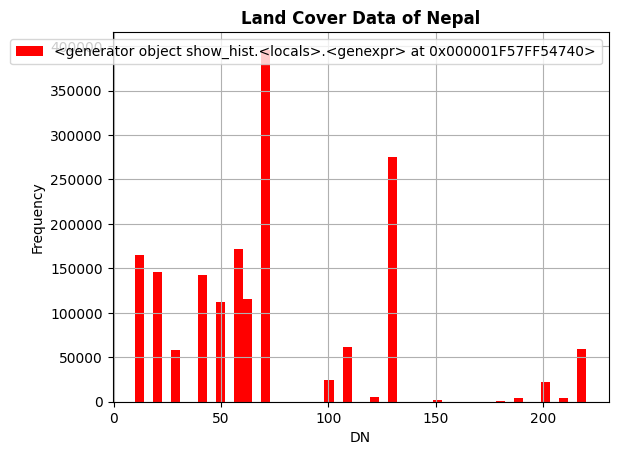

In [11]:
from rasterio.plot import show, show_hist
show_hist(ds, bins=50, title='Land Cover Data of Nepal')


# Writing raster data

In the above section, we read about how to read the raster dataset. In this section we are going to create the `Tiff` file by using rasterio package. 

In [12]:
with rasterio.open(r"../data/output/writing_LC.tif", 'w', 
                   driver = driver,
                   height= rows,
                   width = cols,
                   count = num_bands,
                   crs = proj,
                   transform = gt,
                   dtype = dtype
                   ) as dst:
    dst.write(data)

RasterioIOError: Attempt to create new tiff file '../data/output/writing_LC.tif' failed: No such file or directory

In the below section, we are going to create the several raster data, so it is better to create the function. 

*Exercise 1: Read the file `data/dem/srtm_57_08_1.tif`. Try to get the following things*
* *Number of bands*
* *Coordinate system*
* *Metadata*
* *Minimum elevation of the DEM*
* *Maximum value of the DEM*
* *Cell Size*

*Exercise 2: Visualize the DEM data.*

*Exercise 3: Write the DEM data and save the output named as `dem_output.tif`*

# Masking the raster using shapefile
The mask operation on raster helps to clip the required raster by feature. It will helps to create the new study area or specific area of interest that is an important function when working in GIS. 

In this notebook, we will maskout the Land cover data from ESA to our study area. For this operation, we need one more additional package named as [`fiona`](https://pypi.org/project/Fiona/), which helps to read and write the vector dataset. You will get the more information about `fiona` on next notebook.

In [8]:
import fiona
import rasterio
import rasterio.mask

with fiona.open(r"../data/shp/pokhara.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open(in_img) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta


out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("../data/output/mask.tif", "w", **out_meta) as dest:
    dest.write(out_image) 

*Exercise 1: Mask the raster `in_img` with the your area of interest.*

# Mathematical operations with raster data

In this section we are going to learn about the following topics,

1. Raster value add, substract, multiply, divide
2. Resampling data
3. Reclassification data

## 1. Raster value add, substract, multiply, divide

In [9]:
# Reading the raster as numpy array
ds = rasterio.open(in_img)
data = ds.read(1)

# Add the raster values by constant 1
data = data + 1
print("Data after adding 1: ", data)
print("----------------------------------------------------------------------------------------------------")

# Substract the raster values by constant 2
data = data - 2
print("Data after substracting 2: ", data)
print("----------------------------------------------------------------------------------------------------")

# Multiply the raster values by constant 5
data = data * 5
print("Data after multiplying 5: ", data)
print("----------------------------------------------------------------------------------------------------")

# Divide the raster values by constant 5
data = data / 10
print("Data after dividing by constant 5: ", data)
print("----------------------------------------------------------------------------------------------------")

# Check the min and max values of data
min_value = data.min()
max_value = data.max()
print("min value: ", min_value)
print("max value: ", max_value)
print("----------------------------------------------------------------------------------------------------")

# Create the new raster with new values
with rasterio.open(r'../data/output/raster_math.tif', 'w',
                    driver=ds.driver,
                    width=ds.width,
                   height=ds.height,
                   count=ds.count,
                   crs=ds.crs,
                   transform=ds.transform,
                   dtype=data.dtype
                  ) as dst:
    dst.write(data, indexes=1)
    

Data after adding 1:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------------------------------------------------------------------------------------------------
Data after substracting 2:  [[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]]
----------------------------------------------------------------------------------------------------
Data after multiplying 5:  [[246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 ...
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]]
----------------------------------------------------------------------------------------------------
Data after dividing by constant 5:  [[24.6 24.6 24.6 ... 24.6 24.6 24.6]
 [24.6 24.6 24.6 ... 24.6 24.6 24.6]
 [24.6

## 3. Reclassification raster (optional)

The reclassification is the method for changing the raster cell values to alternative values. It is useful when you want to replace the values of the input raster with new values. This could be due to finding out that the value of a cell should actually be a different value, for example, the land use in an area changed over time. 

In [10]:
ds = rasterio.open(in_img)
data = ds.read()

lista = data.copy()

lista[np.where((lista >=10) & (lista <= 40))] = 1 # Agriculture
lista[np.where((lista >=50) & (lista <= 100))] = 2 # Forest
lista[np.where((lista >=110) & (lista <= 180))] = 3 # grass land
lista[np.where(lista >=190 )] = 4 #urban
lista[np.where(lista >=200)] = 5 #bareland
lista[np.where((lista >=210) & (lista <= 200))] = 6 #Water


with rasterio.open('../data/output/reclassify_lc_2020.tif', 'w',
                   driver=ds.driver,
                   height=ds.height,
                   width=ds.width,
                   count=ds.count,
                   crs=ds.crs,
                   transform=ds.transform,
                   dtype=data.dtype

) as dst:
      dst.write(lista)

### Visualization of reclassified raster

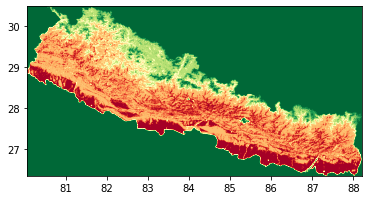

<AxesSubplot:>

In [11]:
# Read data
ds = rasterio.open(r"../data/output/reclassify_lc_2020.tif")
show(ds, transform=ds.transform, cmap='RdYlGn')

*Exercise: reclassify the `mask.tif` file generated from mask tutorial into `pokhara_reclassify.tif`. Please merge the `Forest` and `Grass Land` class as value 5, which will represent the vegatation.*

## 2. Resampling raster (Optional)
Resampling refers to changing the cell values due to changes in the raster cell grid. This can occur during reprojection. Even if the projection is not changing, we may want to change the effective cell size of an existing dataset. There are two type of resampling method,

1. **Upsampling** refers to cases where we are converting to higher resolution smaller cells. 
2. **Downsampling** is resampling to lower resolution/larger cellsizes.

When you change the raster cell grid, you must recalculate the pixel values. There is no “correct” way to do this as all methods involve some interpolation. Here are the list of resampling methods that you can use,

* nearest
* bilinear
* cubic
* average
* sum

Of note, the default `nearest` method may not be suitable for continuous data. In those cases, `bilinear` and `cubic` are better suited. Some specialized statistical resampling method exist, e.g. `average`, which may be useful when certain numerical properties of the data are to be retained. For all the resampling methods, [check here](https://rasterio.readthedocs.io/en/latest/api/rasterio.enums.html#rasterio.enums.Resampling).

In [12]:
from rasterio.enums import Resampling

#factor to rescale the raster
upscale_factor = 2

with rasterio.open(in_img) as dataset:

    print("Old shape of raster: ", dataset.shape)
    
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )
  
    with rasterio.open(r"../data/output/resample_lc.tif", 'w',
                  driver = dataset.driver,
                  height = int(dataset.height * upscale_factor),
                  width = int(dataset.width * upscale_factor),
                  count = dataset.count,
                  crs = dataset.crs,
                  transform = dataset.transform,
                  dtype = data.dtype) as dst:
        dst.write(data)
    

d_res = rasterio.open(r'../data/output/resample_lc.tif')
print("New shape of raster: ", d_res.shape)

Old shape of raster:  (1485, 2932)
New shape of raster:  (2970, 5864)


### Visualization of resample raster

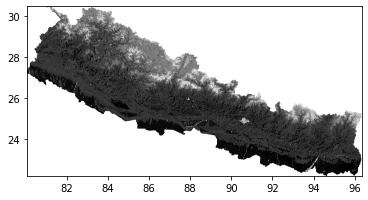

<AxesSubplot:>

In [13]:
show(d_res, transform=ds.transform, cmap='gray')

### Correction on resampling
In the above code, we added the transform paramater of the resampled raster as the input raster. If you visualize it in qgis, the output will apear on the 2 times bigger size. We need to apply the `upscale_factor` to transorm as well. Here is the new transformation,

```
transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )
```

Instead of `transform = dataset.transform` write `transform = transform` in above code to correct it. Check the below cell for the corrected version,

In [14]:
from rasterio.enums import Resampling

#factor to rescale the raster
upscale_factor = 2

with rasterio.open(in_img) as dataset:

    print("Old shape of raster: ", dataset.shape)
    
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )
    

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )
  
    with rasterio.open(r"../data/output/resample_lc_corrected.tif", 'w',
                  driver = dataset.driver,
                  height = int(dataset.height * upscale_factor),
                  width = int(dataset.width * upscale_factor),
                  count = dataset.count,
                  crs = dataset.crs,
                  transform = transform,  # Correct transform value
                  dtype = data.dtype) as dst:
        dst.write(data)
    

d_res = rasterio.open(r'../data/output/resample_lc.tif')
print("New shape of raster: ", d_res.shape)

Old shape of raster:  (1485, 2932)
New shape of raster:  (2970, 5864)


### Visualization of resample data

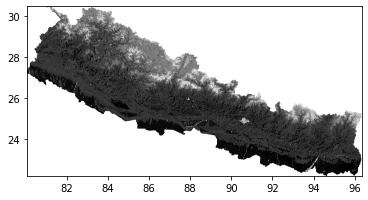

<AxesSubplot:>

In [15]:
show(d_res, transform=ds.transform, cmap='gray')

*Exercise 1: Downscale the `resample_lc_corrected.tif` file with 5 times (i.e. 0.2) and save the output as `resample_0.2.tif`*

*Exercise 2: Visualize the output from exercise 1.*

## 4. NDVI calculation (Optional)

NDVI is used to quantify vegetation greenness and is useful in understanding vegetation density and assessing changes in plant health. NDVI is calculated as a ratio between the red (R) and near infrared (NIR) values in traditional fashion: 

**NDVI = (NIR - R) / (NIR + R)**

NIR – reflection in the near-infrared spectrum

RED – reflection in the red range of the spectrum



In [16]:
# Setting image location
img_red = r"../data/geotiff/MODIS_18Dec17_RED.tif"
img_nir = r"../data/geotiff/MODIS_18Dec17_NIR.tif"

# Reading raster
ds_nir = rasterio.open(img_nir)
data_nir = ds_nir.read()
ds_red = rasterio.open(img_red)
data_red = ds_red.read()

data_NDVI = (data_nir - data_red) / (data_nir + data_red)

# Create the NDVI raster
with rasterio.open('../data/output/ndvi.tif', 'w',
                   driver=ds_nir.driver,
                   width=ds_nir.width,
                   height=ds_nir.height,
                   count=ds_nir.count,
                   crs=ds_nir.crs,
                   trasform=ds_nir.transform,
                   dtype='float64'
                   ) as dst:
    dst.write(data_NDVI)

C:\Users\gic\anaconda3\envs\geopandas\lib\site-packages\rasterio\__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = writer(path, mode, driver=driver,


### Visualization of NDVI

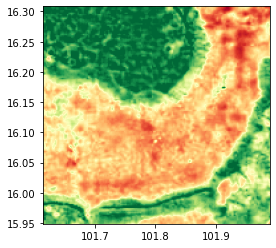

<AxesSubplot:>

In [17]:
# Reading the raster file
ds = rasterio.open(r'../data/output/ndvi_dec.tif')
show(ds, transform=ds.transform, cmap='RdYlGn')

*Exercise 1: calculate the NDVI for 18 November. And visualize it on notebook.*

*Exercise 2: Read, write and visualize your own dataset.*

*Exercise 3: Generate the NDVI map of whole Nepal using Landsat data (For downloading the landsat data, visit [USGS earth explorer](https://earthexplorer.usgs.gov/)).*

# Thank you